The data which we r inputting into embedding lay should be integer encoded

In [1]:
docs = ['go india',
		'india india',
		'hip hip hurray',
		'jeetega bhai jeetega india jeetega',
		'bharat mata ki jai',
		'kohli kohli',
		'sachin sachin',
		'dhoni dhoni',
		'modi ji ki jai',
		'inquilab zindabad']

In [2]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()

In [3]:
tokenizer.fit_on_texts(docs)

In [4]:
len(tokenizer.word_index)

17

In [5]:
sequences = tokenizer.texts_to_sequences(docs)
sequences

[[9, 1],
 [1, 1],
 [3, 3, 10],
 [2, 11, 2, 1, 2],
 [12, 13, 4, 5],
 [6, 6],
 [7, 7],
 [8, 8],
 [14, 15, 4, 5],
 [16, 17]]

In [6]:
from keras.utils import pad_sequences
sequences = pad_sequences(sequences,padding='post')
sequences

array([[ 9,  1,  0,  0,  0],
       [ 1,  1,  0,  0,  0],
       [ 3,  3, 10,  0,  0],
       [ 2, 11,  2,  1,  2],
       [12, 13,  4,  5,  0],
       [ 6,  6,  0,  0,  0],
       [ 7,  7,  0,  0,  0],
       [ 8,  8,  0,  0,  0],
       [14, 15,  4,  5,  0],
       [16, 17,  0,  0,  0]])

In [7]:
# from keras import Sequential
# from keras.layers import Embedding

In [8]:
# model = Sequential()
# model.add(Embedding(17,output_dim=2,input_length=5))

# model.summary()

17 - is the total uniqu words (17 words so 17 dim using OHE)   
2 - (hidden lay)is the output dim,the dim of dense vector .we r reprsenting each word with 2 values(it can be 2 or 200 dim also)    
5 - how many words as i/p in i/p lay  

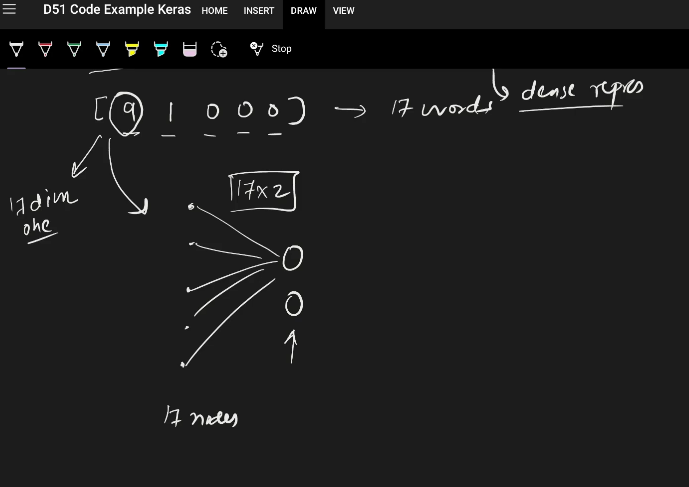

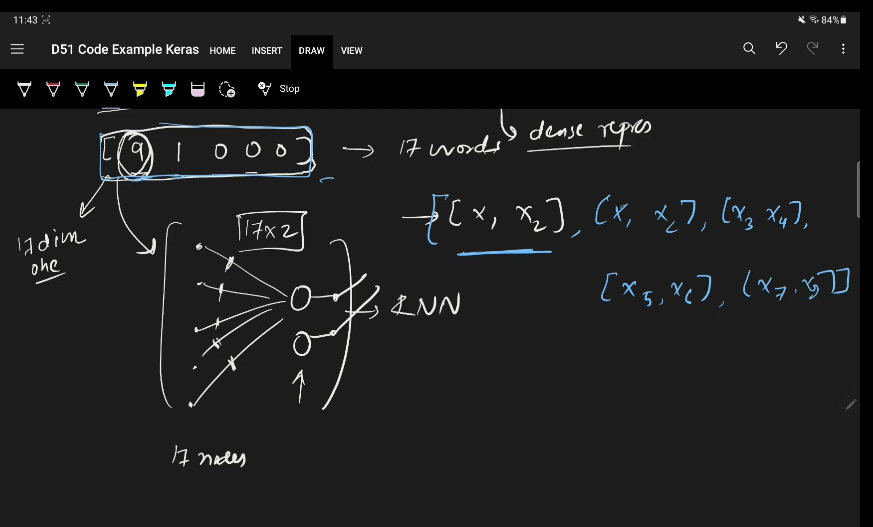

In [9]:
# model.compile('adam','accuracy')

In [10]:
# pred = model.predict(sequences)
# print(pred)

In [11]:
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras import Sequential
from keras.layers import Dense,SimpleRNN,Embedding,Flatten

In [12]:
(X_train,y_train),(X_test,y_test) = imdb.load_data()


# vocab_size = 10000  # Adjust this value as needed
# (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

In [13]:
X_train = pad_sequences(X_train,padding='post',maxlen=50)
X_test = pad_sequences(X_test,padding='post',maxlen=50)

In [14]:
X_train.shape

(25000, 50)

In [21]:
model = Sequential()
model.add(Embedding(10000, 2))
model.add(SimpleRNN(32,return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 2)           20000     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                1120      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 21153 (82.63 KB)
Trainable params: 21153 (82.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


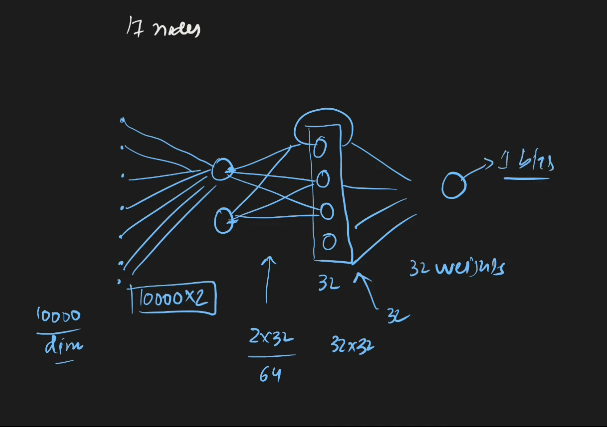

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5


InvalidArgumentError: Graph execution error:

Detected at node 'sequential/embedding/embedding_lookup' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "C:\Users\sonal\Documents\virtualenv\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\sonal\Documents\virtualenv\Lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\sonal\Documents\virtualenv\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start
      self.io_loop.start()
    File "C:\Users\sonal\Documents\virtualenv\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\sonal\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever
      self._run_once()
    File "C:\Users\sonal\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once
      handle._run()
    File "C:\Users\sonal\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\sonal\Documents\virtualenv\Lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "C:\Users\sonal\Documents\virtualenv\Lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "C:\Users\sonal\Documents\virtualenv\Lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell
      await result
    File "C:\Users\sonal\Documents\virtualenv\Lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "C:\Users\sonal\Documents\virtualenv\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\sonal\Documents\virtualenv\Lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\sonal\Documents\virtualenv\Lib\site-packages\IPython\core\interactiveshell.py", line 3024, in run_cell
      result = self._run_cell(
    File "C:\Users\sonal\Documents\virtualenv\Lib\site-packages\IPython\core\interactiveshell.py", line 3079, in _run_cell
      result = runner(coro)
    File "C:\Users\sonal\Documents\virtualenv\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\sonal\Documents\virtualenv\Lib\site-packages\IPython\core\interactiveshell.py", line 3284, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\sonal\Documents\virtualenv\Lib\site-packages\IPython\core\interactiveshell.py", line 3466, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\sonal\Documents\virtualenv\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\sonal\AppData\Local\Temp\ipykernel_11196\863240012.py", line 2, in <module>
      history = model.fit(X_train, y_train,epochs=5,validation_data=(X_test,y_test))
    File "C:\Users\sonal\Documents\virtualenv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\sonal\Documents\virtualenv\Lib\site-packages\keras\src\engine\training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\sonal\Documents\virtualenv\Lib\site-packages\keras\src\engine\training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "C:\Users\sonal\Documents\virtualenv\Lib\site-packages\keras\src\engine\training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\sonal\Documents\virtualenv\Lib\site-packages\keras\src\engine\training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "C:\Users\sonal\Documents\virtualenv\Lib\site-packages\keras\src\engine\training.py", line 1080, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\sonal\Documents\virtualenv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\sonal\Documents\virtualenv\Lib\site-packages\keras\src\engine\training.py", line 569, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\sonal\Documents\virtualenv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\sonal\Documents\virtualenv\Lib\site-packages\keras\src\engine\base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\sonal\Documents\virtualenv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\sonal\Documents\virtualenv\Lib\site-packages\keras\src\engine\sequential.py", line 405, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\sonal\Documents\virtualenv\Lib\site-packages\keras\src\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\sonal\Documents\virtualenv\Lib\site-packages\keras\src\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\sonal\Documents\virtualenv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\sonal\Documents\virtualenv\Lib\site-packages\keras\src\engine\base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\sonal\Documents\virtualenv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\sonal\Documents\virtualenv\Lib\site-packages\keras\src\layers\core\embedding.py", line 272, in call
      out = tf.nn.embedding_lookup(self.embeddings, inputs)
Node: 'sequential/embedding/embedding_lookup'
indices[0,6] = 16390 is not in [0, 10000)
	 [[{{node sequential/embedding/embedding_lookup}}]] [Op:__inference_train_function_1888]

In [18]:
print(len(X_train[0]))  # Check the length of the first sequence in X_train


50


In [19]:
print(X_train[0])  # Check the length of the first sequence in X_train


[2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4  226   65   16   38 1334   88   12   16  283    5   16 4472  113
  103   32   15   16 5345   19  178   32]


In [22]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

vocab_size = 10000  # Adjust this value as needed
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

max_sequence_length = 50  # Adjust this value as needed
X_train = pad_sequences(X_train, padding='post', maxlen=max_sequence_length)
X_test = pad_sequences(X_test, padding='post', maxlen=max_sequence_length)

# Create the Sequential model
model = Sequential()
model.add(Embedding(vocab_size, 2))
model.add(SimpleRNN(32, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

model.summary()

# Compile and train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 2)           20000     
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                1120      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 21153 (82.63 KB)
Trainable params: 21153 (82.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
782/782 [==============================] - 22s 25ms/step - loss: 0.6464 - acc: 0.5890 - val_loss: 0.4695 - val_acc: 0.7801
Epoch 2/5
782/782 [==============================] - 19s 25ms/step - loss: 0.4139 - acc: 0.8135 - val_loss: 0.4371 - val_acc: 0.8007
Epoch 3/5
782/78